## Timeseries forecasting by Arima 

### Importing packages and handling in pandas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib.pyplot import rcParams
rc = rcParams['figure.figsize'] = 12,5


In [3]:
data = pd.read_csv('E:\AI-ML PYTHON\AirPassengers - Govindaraj V.csv')
print(data.head())
print('\n datatypes')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 datatypes
Month          object
#Passengers     int64
dtype: object


 - read data in datetime format

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data = pd.read_csv(r'E:\AI-ML PYTHON\AirPassengers - Govindaraj V.csv',parse_dates=True, index_col=0, date_parser=dateparse)
print(data.head())  

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [5]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


 - convert to timeseries

In [7]:
ts = data['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [8]:
ts['1949-04-01']

129

In [9]:
ts['1949-01-01':'1949-05-01'] 

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

## Check for Stationary
## plot the time series

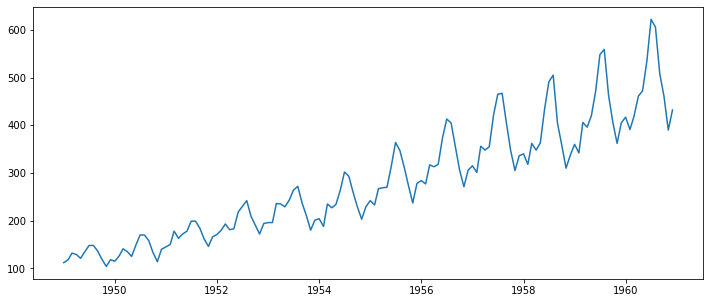

In [10]:
# rc = rcParams['figure.figsize'] = 10,7
plt.rc 
plt.plot(Timeseries)

## Function for testing  Stationarity

In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # determing the rolling statistics
    rollmean = timeseries.rolling(window=12).mean()
    rollstd = timeseries.rolling(window=12).std()
    
    # plotting the rolling statistics
    plt.rc 
    org = plt.plot(timeseries, color='blue',label='original')
    mean = plt.plot(rollmean, color='red', label='rollmean')
    std = plt.plot(rollstd, color='green', label='rollstd')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Rolling std')
    plt.show(block=False)
    
    # dickey=fuller statistics
    print('\n  dickey-fuller statistics')
    dftest = adfuller(timeseries, autolag='AIC')
    print('data in dftest \n',dftest)
    print('\n')
    dfoutput = pd.Series(dftest[:4], index=['Test Statistics','p-value','Lags used', 'No. of observations used']) # 4 indexs only want
    for key,value in dftest[4].items(): # 4th value in data is dictionay format 
        dfoutput['critical values (%s)'%key] =  value
    print(dfoutput)

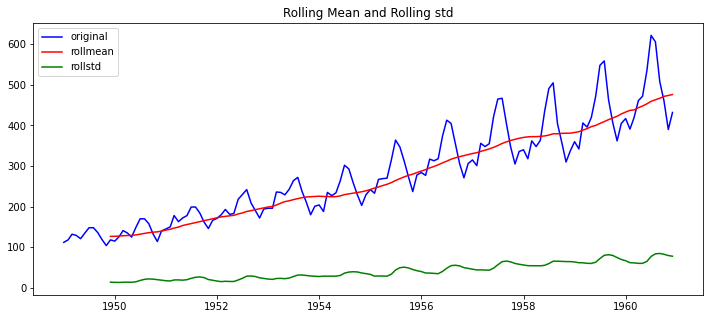


  dickey-fuller statistics
data in dftest 
 (0.8153688792060457, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


Test Statistics               0.815369
p-value                       0.991880
Lags used                    13.000000
No. of observations used    130.000000
critical values (1%)         -3.481682
critical values (5%)         -2.884042
critical values (10%)        -2.578770
dtype: float64


In [12]:
test_stationarity(ts)

## Making Timeseries Stationay

 - ### Estimating and Eliminating Trend

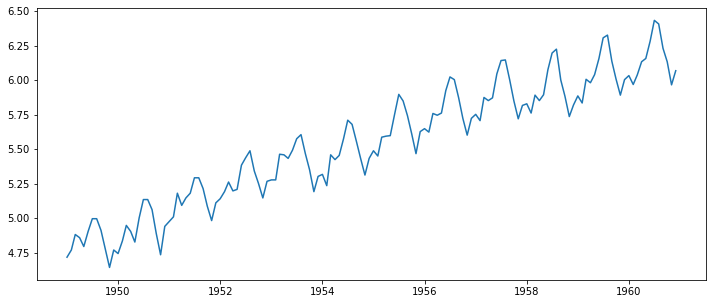

In [13]:
ts_log = np.log(ts)
plt.plot(ts_log)


## Smoothing

 - ### Moving Average

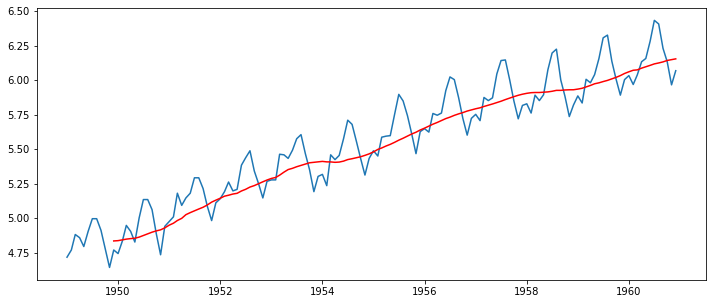

In [14]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [15]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

In [17]:
moving_avg

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    6.124517
1960-09-01    6.132246
1960-10-01    6.142628
1960-11-01    6.148837
1960-12-01    6.154215
Name: #Passengers, Length: 144, dtype: float64

moving average is calculated at end of the year 

 ##  Use differencing in order to make stationary

In [18]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)


Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [19]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()


Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

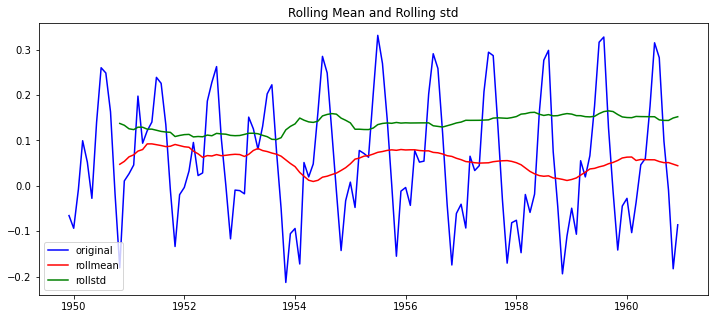


  dickey-fuller statistics
data in dftest 
 (-3.162907991300865, 0.02223463000124339, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747125)


Test Statistics              -3.162908
p-value                       0.022235
Lags used                    13.000000
No. of observations used    119.000000
critical values (1%)         -3.486535
critical values (5%)         -2.886151
critical values (10%)        -2.579896
dtype: float64


In [20]:
test_stationarity(ts_log_moving_avg_diff)


### Exponentially Weighted Moving Average

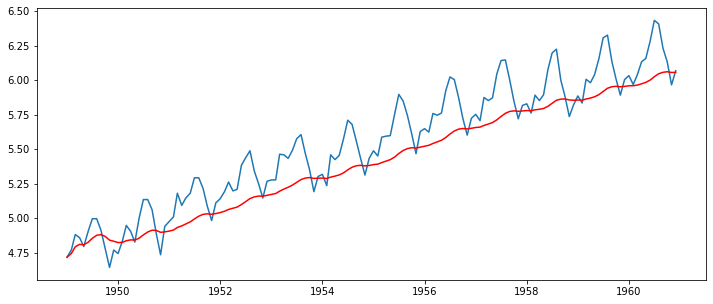

In [25]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')


In [26]:
expwighted_avg

Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
                ...   
1960-08-01    6.046445
1960-09-01    6.056778
1960-10-01    6.061079
1960-11-01    6.055750
1960-12-01    6.056461
Name: #Passengers, Length: 144, dtype: float64

In [27]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

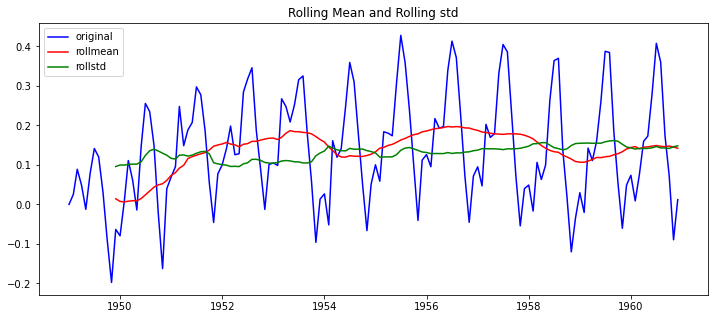


  dickey-fuller statistics
data in dftest 
 (-3.6012624201616794, 0.005736938801511833, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -462.8241632483199)


Test Statistics              -3.601262
p-value                       0.005737
Lags used                    13.000000
No. of observations used    130.000000
critical values (1%)         -3.481682
critical values (5%)         -2.884042
critical values (10%)        -2.578770
dtype: float64


In [28]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


## Eliminating Trend and Seasonality
- ## Differencing

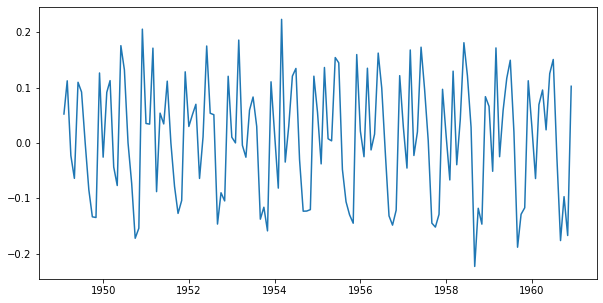

In [31]:
plt.figure(figsize=(10,5))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)


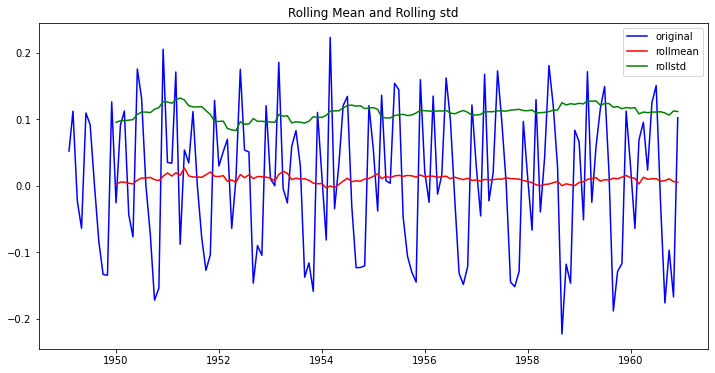


  dickey-fuller statistics
data in dftest 
 (-2.7171305983881022, 0.07112054815086385, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -440.35846985568105)


Test Statistics              -2.717131
p-value                       0.071121
Lags used                    14.000000
No. of observations used    128.000000
critical values (1%)         -3.482501
critical values (5%)         -2.884398
critical values (10%)        -2.578960
dtype: float64


In [32]:
plt.figure(figsize=(12,6))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)


### Decomposition

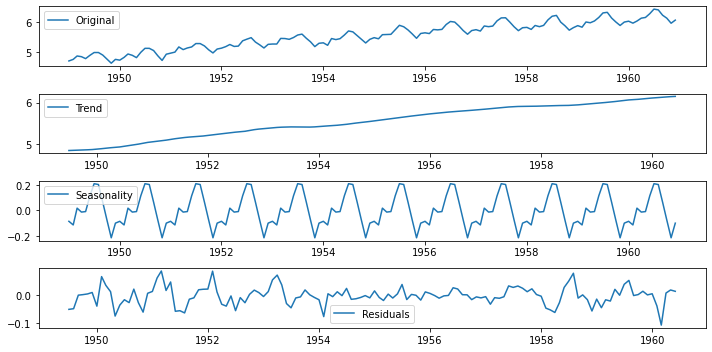

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


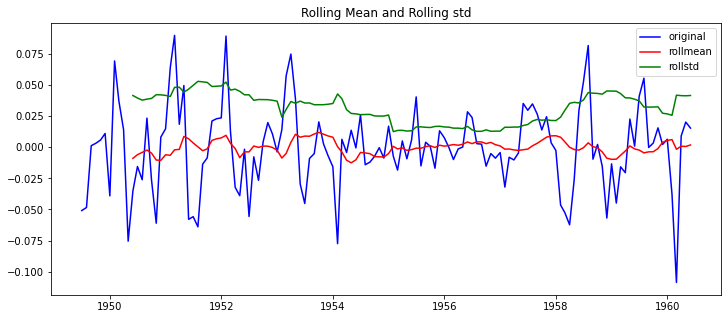


  dickey-fuller statistics
data in dftest 
 (-6.3323867976448565, 2.885058903323538e-08, 9, 122, {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}, -517.2642969403789)


Test Statistics            -6.332387e+00
p-value                     2.885059e-08
Lags used                   9.000000e+00
No. of observations used    1.220000e+02
critical values (1%)       -3.485122e+00
critical values (5%)       -2.885538e+00
critical values (10%)      -2.579569e+00
dtype: float64


In [34]:
plt.figure(figsize=(12,5))
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


# Forecasting the timeseries 

- So finally selected best stationary model one  is ts_log_diff coz it has more constant mean and constant std

## ACF and PACF 
    - auto correlation and partial auto correlation for choosing best parameters and model for forecasting

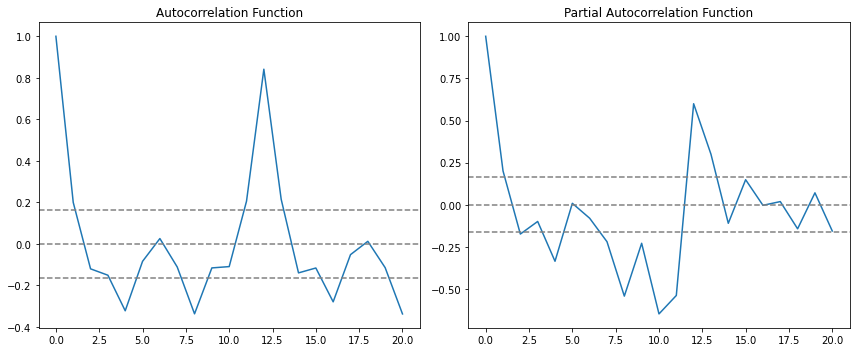

In [35]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:  
#plt.figure(figsize=(10,5))
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
#plt.figure(figsize=(10,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


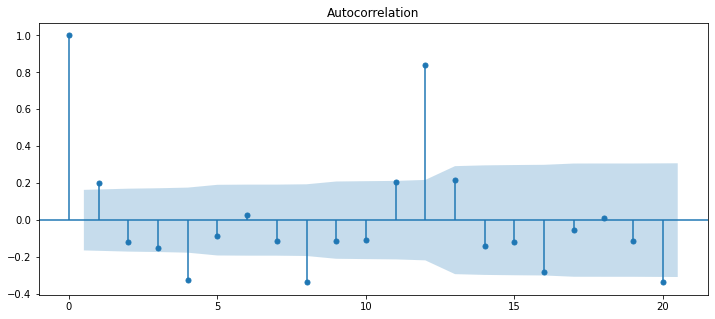

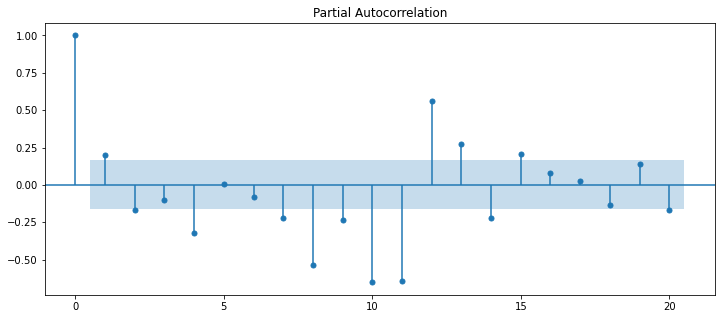

In [36]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(ts_log_diff, lags=20)
sm.graphics.tsa.plot_pacf(ts_log_diff,lags=20)
plt.show()

# AR Model

F:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
F:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.5023')

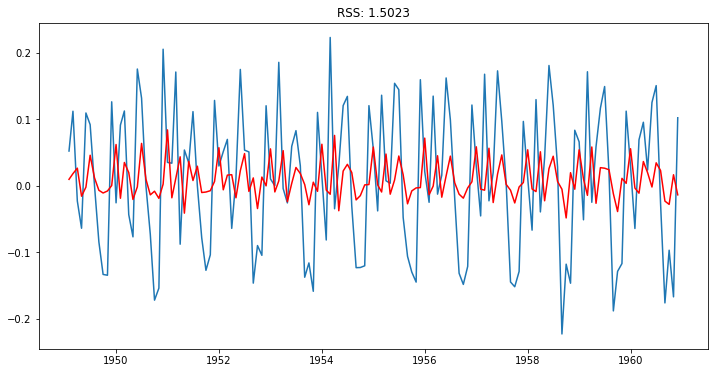

In [37]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


# MA Model

F:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
F:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.4721')

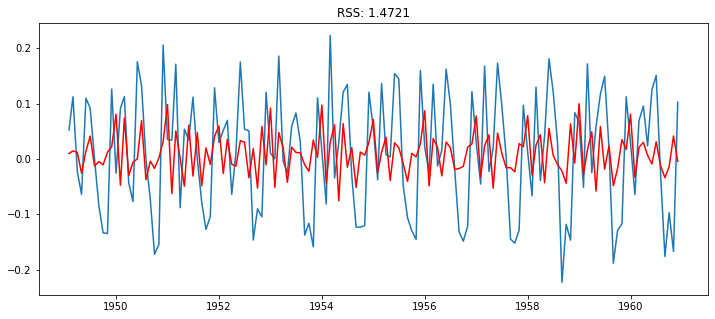

In [38]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(12,5))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))


# ARIMA Model 

F:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
F:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.0292')

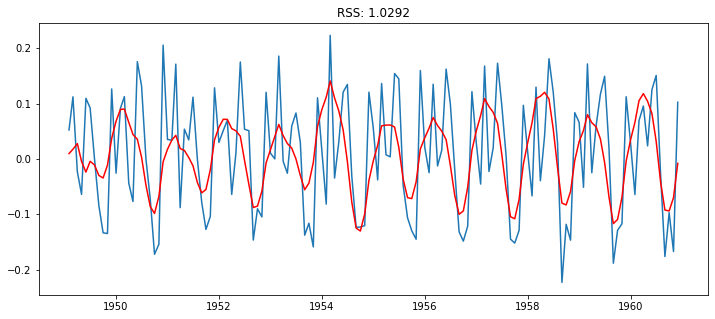

In [39]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(12,5))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


## convert to original scale:

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())


Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [41]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())


Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [42]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [43]:
predictions_ARIMA_log.head(10)


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665109
dtype: float64

In [44]:
ts_log.head(10)


Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
Name: #Passengers, dtype: float64

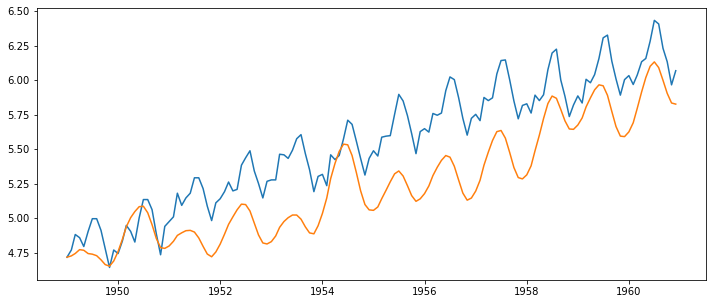

In [45]:
plt.figure(figsize=(12,5))
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)


Text(0.5, 1.0, 'RMSE: 90.1047')

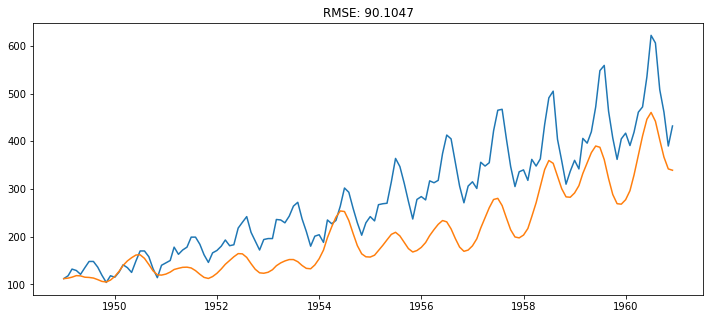

In [48]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ts) 
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))


In [49]:
predictions_ARIMA


Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073412
1949-04-01    118.301981
1949-05-01    117.768358
                 ...    
1960-08-01    441.885463
1960-09-01    402.905026
1960-10-01    366.752705
1960-11-01    341.984067
1960-12-01    339.216077
Length: 144, dtype: float64

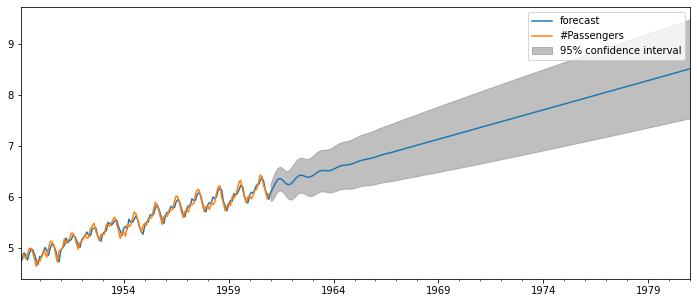

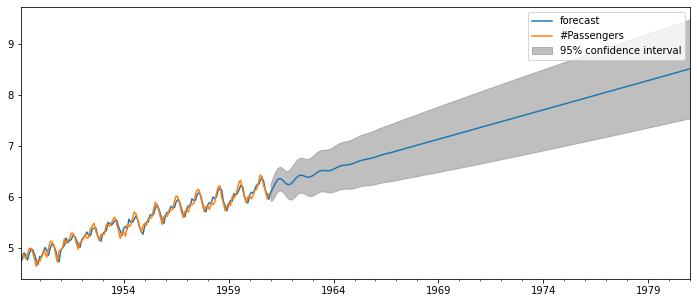

In [51]:
results_ARIMA.plot_predict(1,384)


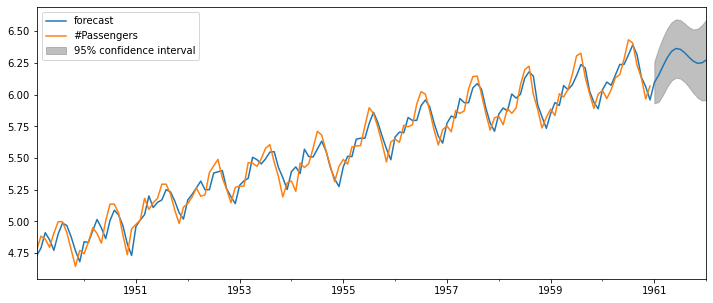

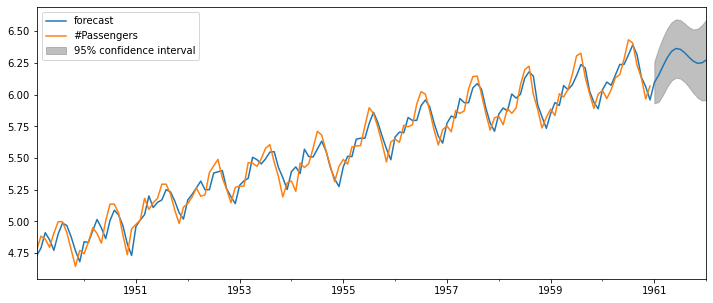

In [52]:
results_ARIMA.plot_predict(1,156)


In [53]:
x=results_ARIMA.forecast(steps=156)


In [54]:
x

(array([6.0955339 , 6.15281395, 6.22442952, 6.29241082, 6.34164695,
        6.36359343, 6.35784672, 6.33139297, 6.29597539, 6.26447716,
        6.24738327, 6.25025168, 6.27275825, 6.30940292, 6.35151467,
        6.38988626, 6.41727353, 6.4301103 , 6.42906672, 6.41842478,
        6.40456148, 6.3940361 , 6.39183075, 6.4001949 , 6.41833672,
        6.44295381, 6.46937404, 6.49293953, 6.51024088, 6.51989007,
        6.52267557, 6.5211237 , 6.51864512, 6.51853674, 6.52311905,
        6.53322338, 6.54812843, 6.56591526, 6.58410275, 6.60036505,
        6.61313233, 6.6219275 , 6.62737761, 6.63093104, 6.63438665,
        6.63937961, 6.64696478, 6.65739811, 6.67015292, 6.68414216,
        6.69806589, 6.71077863, 6.72157695, 6.73033949, 6.73749777,
        6.74386346, 6.75037291, 6.7578256 , 6.76668648, 6.77699787,
        6.78841281, 6.80032813, 6.81207153, 6.82308718, 6.83307095,
        6.84202452, 6.85022273, 6.85811182, 6.86617301, 6.87479111,
        6.88416262, 6.89426341, 6.90487845, 6.91